In [25]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import os
import imageio

SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"]})

fig_labels = ['$S$', '$b_e$ (pA)', '$E_{L,i}$ (mV)', '$E_{L,e}$ (mV)', '$T$ (ms)']

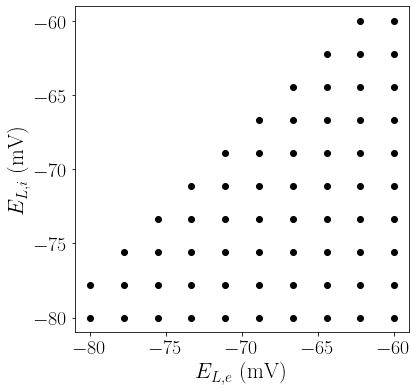

In [40]:
# First the 2D ELE ELI space
ELE = np.linspace(-80, -60, 10)
ELI = np.linspace(-80, -60, 10)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
# Let us say that pair[0] = ELE, pair[1] = ELI
for pair in itertools.product(ELE, repeat=2):
    if pair[1] < pair[0] + 4:
        ax.scatter(pair[0], pair[1], c='k')

ax.set(ylabel='$E_{L,i}$ (mV)', xlabel='$E_{L,e}$ (mV)')
plt.show()

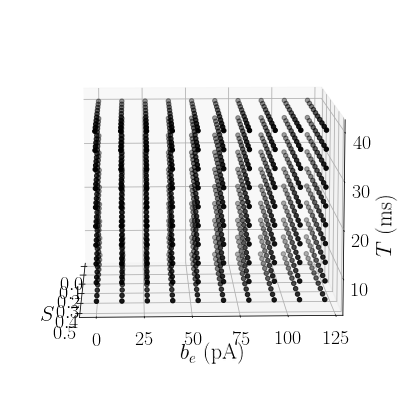

In [37]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

steps = 10

x_arr = np.zeros(steps**3)
y_arr = np.zeros(steps**3)
z_arr = np.zeros(steps**3)

Ss = np.linspace(0, 0.5, steps)
Ts = np.linspace(5, 40, steps)
bs = np.linspace(0, 120, steps)

idxes = np.arange(steps)
for ii, trio in enumerate(itertools.product(idxes, repeat=3)):
    x_arr[ii] = Ss[[trio[0]]]
    y_arr[ii] = bs[[trio[1]]]
    z_arr[ii] = Ts[[trio[2]]]
img = ax.scatter(x_arr, y_arr, z_arr, c='k')
ax.set_xlabel(fig_labels[0], labelpad=8)
ax.set_ylabel(fig_labels[1], labelpad=8)
ax.set_zlabel(fig_labels[-1], labelpad=8)
for ii in range(0,360,2):
    ax.view_init(elev=10., azim=ii)
    plt.tight_layout()
    fig.savefig("./figures/rotating_parameter/movie%d.jpg" % ii, bbox_inches='tight')

In [31]:
movie_folder = "./figures/rotating_parameter/"
images = []
for step in range(0, 360, 5):
    filename = movie_folder + f'movie{step}.png'
    images.append(imageio.imread(filename))
imageio.mimsave(movie_folder + 'params.gif', images, duration=0.5)

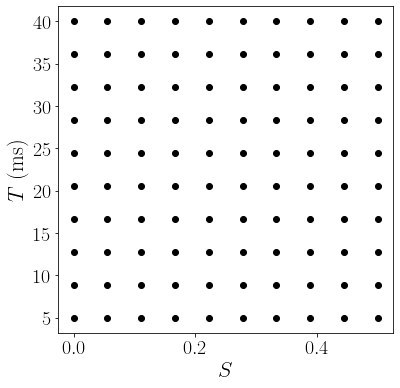

In [44]:
# First the 2D ELE ELI space
Ss = np.linspace(0, 0.5, steps)
Ts = np.linspace(5, 40, steps)
bs = np.linspace(0, 120, steps)

idxes = np.arange(steps)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
# Let us say that pair[0] = ELE, pair[1] = ELI
for ii, trio in enumerate(itertools.product(idxes, repeat=2)):
    img = ax.scatter(Ss[[trio[0]]], Ts[[trio[1]]], c='k')

ax.set(ylabel='$T$ (ms)', xlabel='$S$')
plt.show()

C:\Users\David\AppData\Local\Temp/ipykernel_13420/3556965594.py:3: RuntimeWarning: divide by zero encountered in true_divide
  row = 2/(1 + np.exp(120/(bs)))


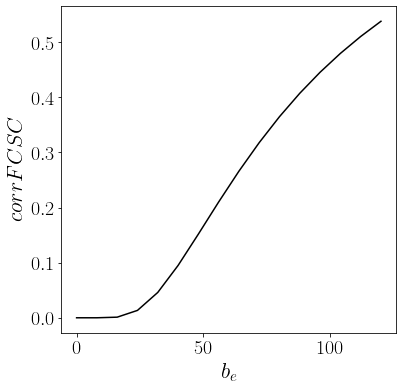

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
bs = np.linspace(0, 120, 16)
row = 2/(1 + np.exp(120/(bs)))
ax.plot(bs, row, c='k', alpha=1)
ax.set(ylabel=f'$corrFCSC$', xlabel='$b_e$')
plt.show()

In [57]:
from matplotlib.ticker import MaxNLocator
from sklearn.cluster import KMeans
n_clusters = 6
ELEmaxmin = (-75, -80)
state = 'Healthy'


data_FC = np.load('./data/FCprocessed.npy')
data_FCSC = np.load('./data/corrFCSCprocessed.npy')


kmeans_FC = KMeans(n_clusters=n_clusters, random_state=4).fit(data_FC[:, :16])
kmeans_FCSC = KMeans(n_clusters=n_clusters, random_state=4).fit(data_FCSC[:, :16])

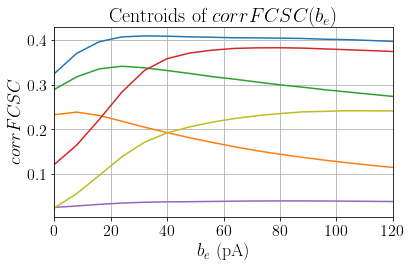

In [60]:
#fig, axes = plt.subplots(7, 3, figsize=(20, 25))
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:olive', 'tab:grey',
           'tab:pink', 'tab:brown', 'tab:cyan']
palette = palette[:n_clusters]

ax.grid()
ax.set_xlim((0, 120))

for ii, centroid in enumerate(kmeans_FCSC.cluster_centers_):
    ax.plot(np.linspace(0, 120, 16), centroid, c=palette[ii], label=f'Classes {ii}')
    ax.set(ylabel='$corrFCSC$', xlabel='$b_e$ (pA)', title=f'Centroids of $corrFCSC(b_e)$')
    ax.xaxis.set_major_locator(MaxNLocator(6)) 

axes[1].legend(loc=(1.04,0))
plt.tight_layout()
plt.show()

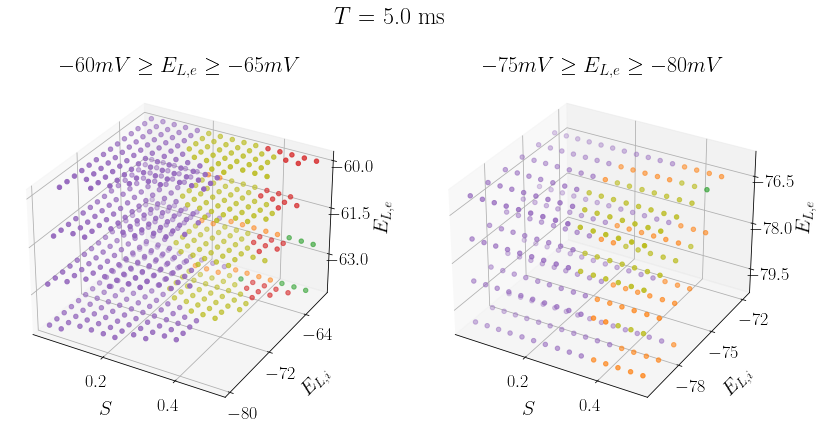

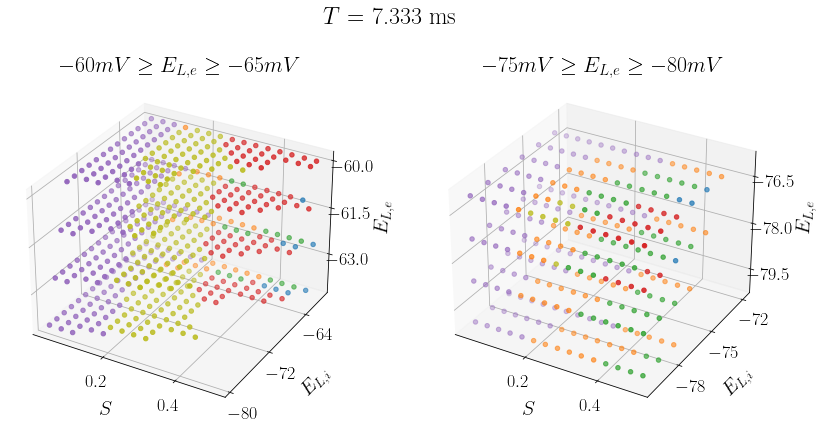

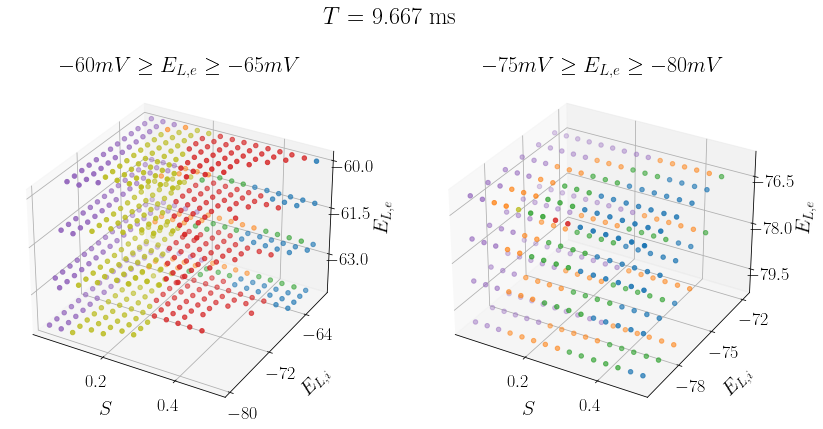

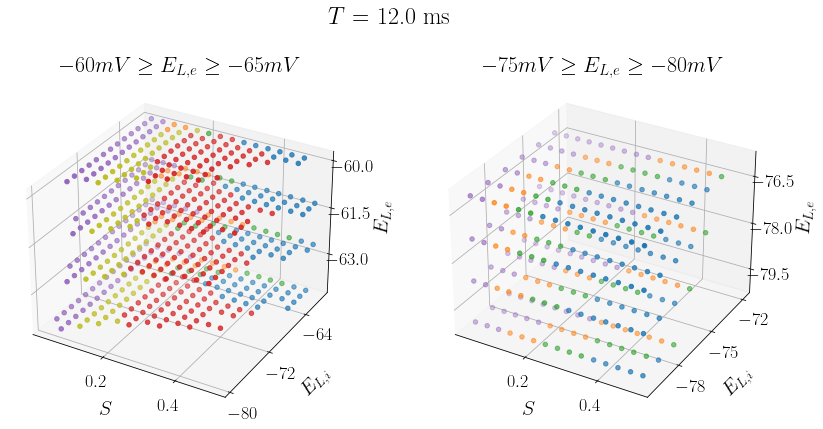

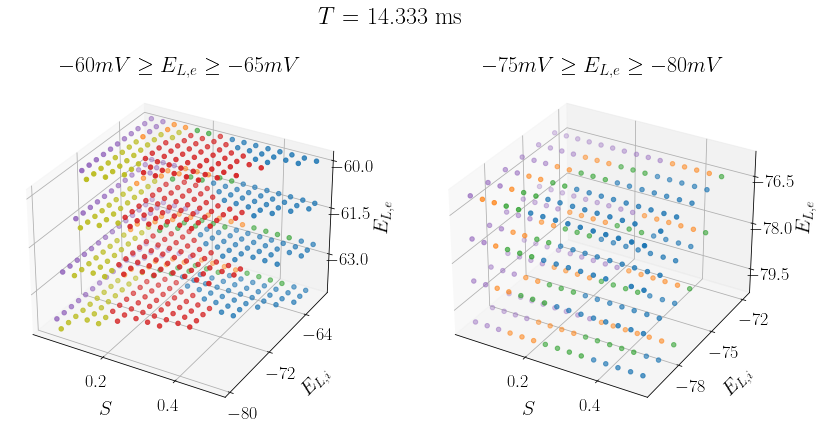

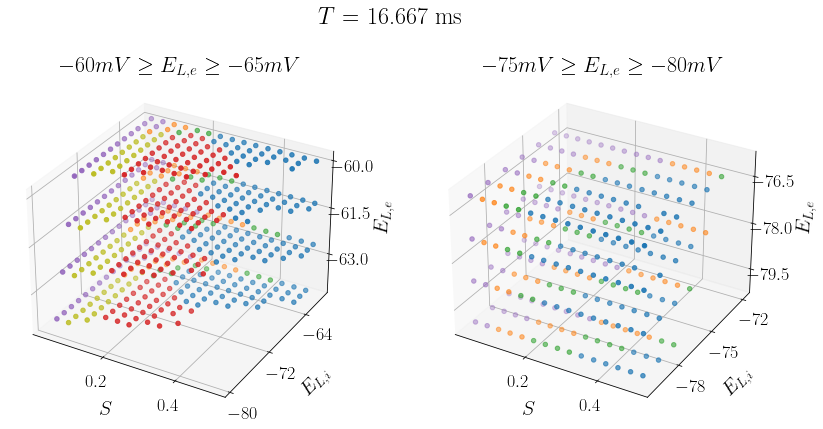

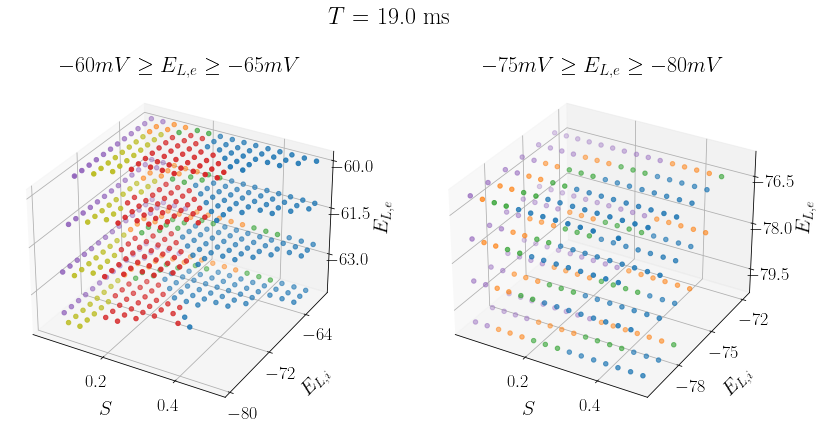

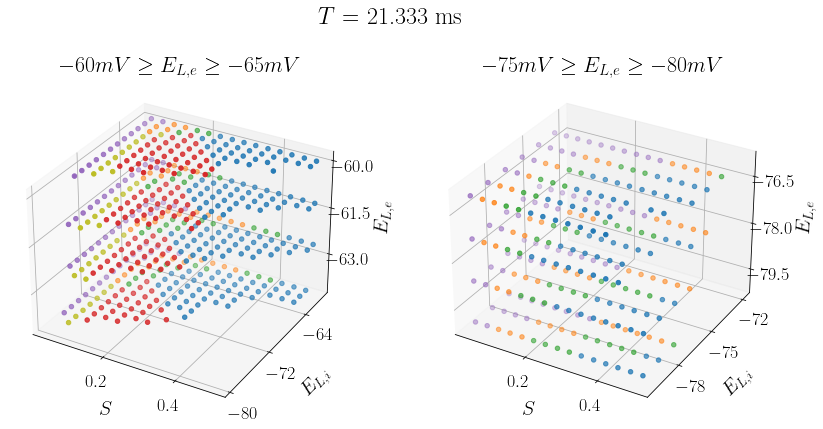

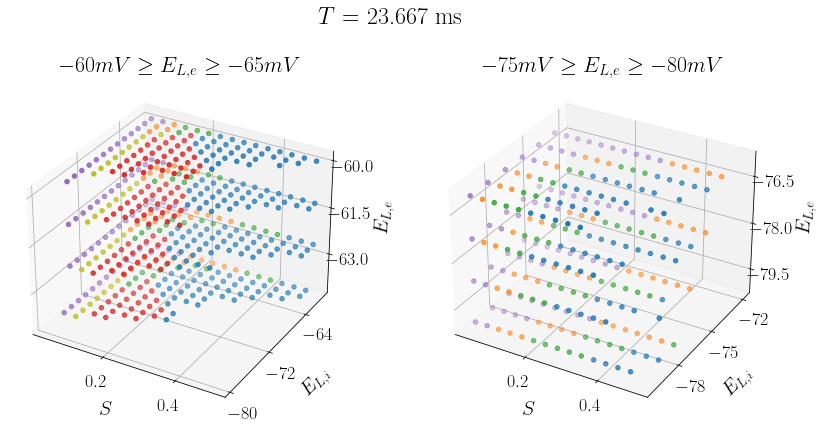

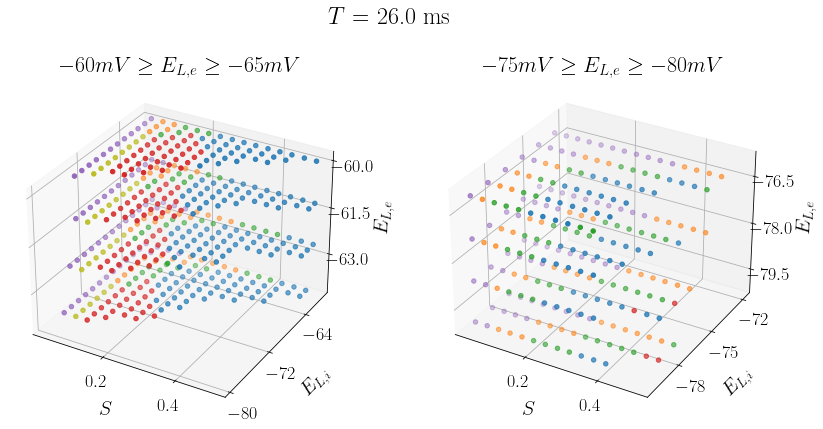

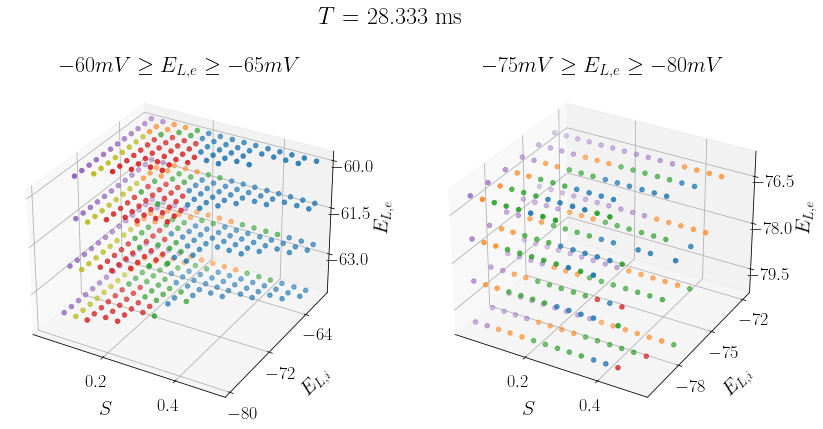

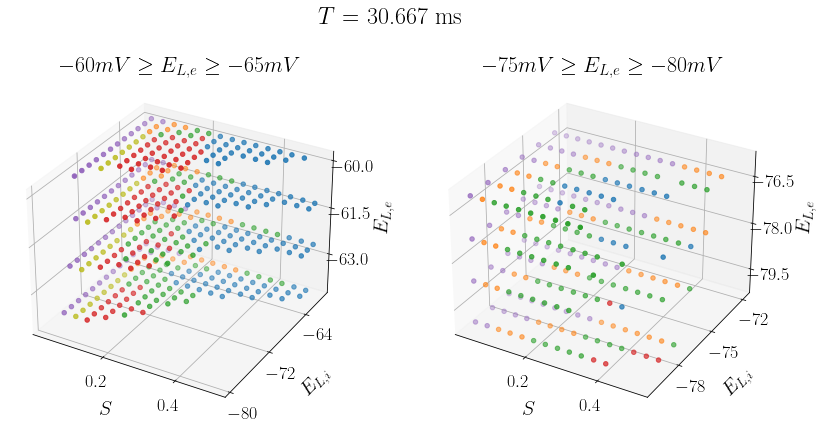

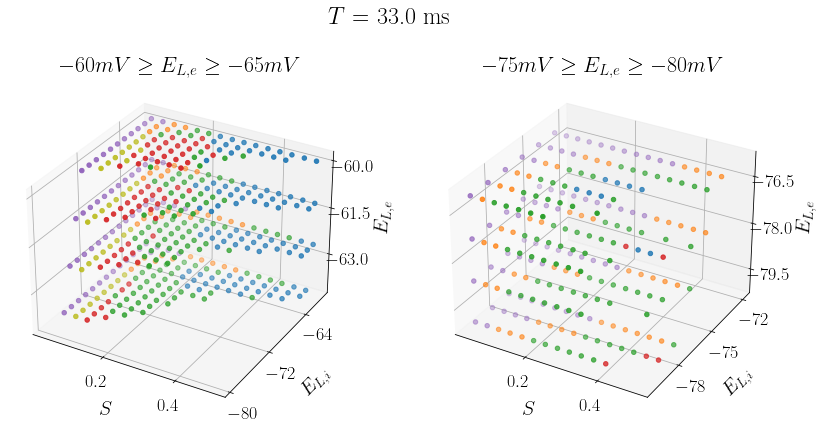

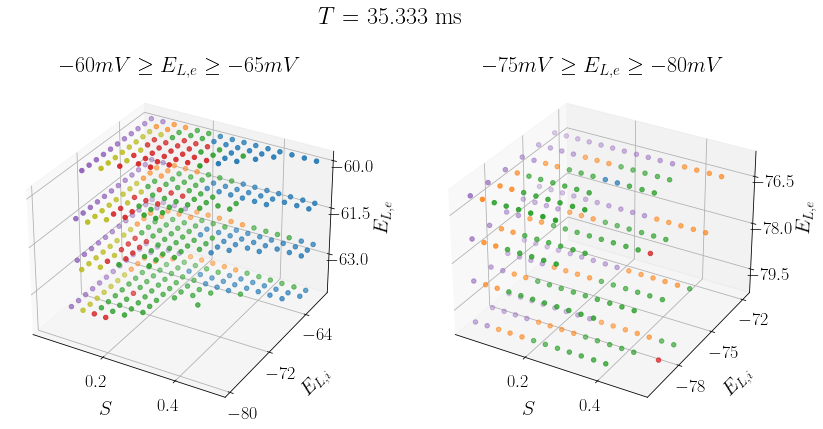

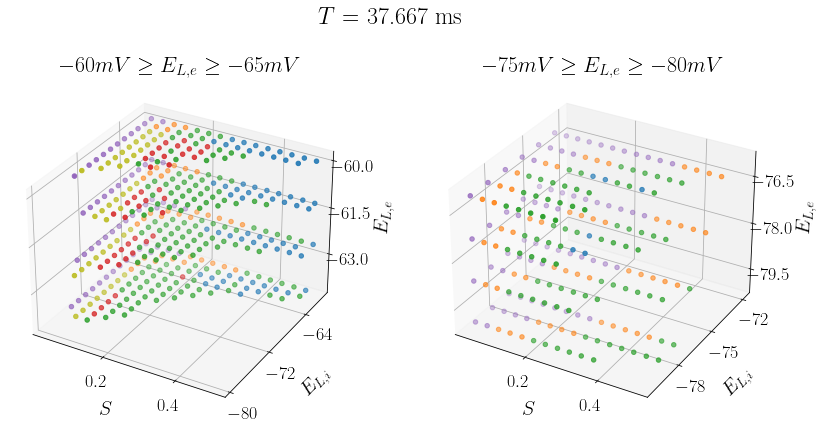

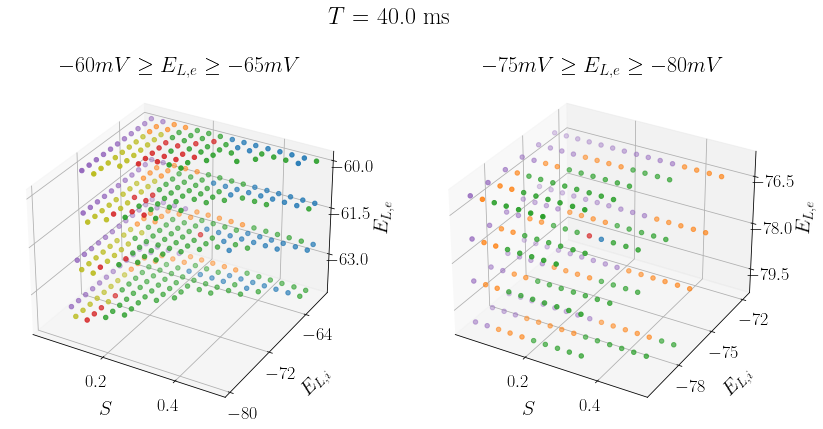

In [83]:
from matplotlib.ticker import MaxNLocator
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


for T in np.round(np.linspace(5, 40, 16), 3):
    fig = plt.figure(figsize=(12, 6))
    axes = []
    axes.append(fig.add_subplot(1, 2, 1, projection='3d'))
    axes.append(fig.add_subplot(1, 2, 2, projection='3d'))
    for ii, ax in enumerate(axes):
        if ii == 0:
            ELEmaxmin = (-60, -65)
            ax.set(ylim=(-80.5, -59.5))
        if ii == 1:
            ELEmaxmin = (-75, -80)
            ax.set(ylim=(-80.5, -71.5))
        T_idxs = data_FC[:, -1] == T
        ELE_idxs = np.logical_and(data_FC[:, -2] <= ELEmaxmin[0], data_FC[:, -2] >= ELEmaxmin[1])

        data_FCSC_plot = data_FCSC[np.logical_and(T_idxs, ELE_idxs), :17]  # Let's keep also a to color code
        labels_FCSC = kmeans_FCSC.labels_[np.logical_and(T_idxs, ELE_idxs)]

        colors = [palette[idx] for idx in labels_FCSC]
        
        # Now the 3D plots of the assigned values, cool that I can fit all of them in the plot!
        data_FCSC_scatter = data_FCSC[np.logical_and(T_idxs, ELE_idxs), 16:19]  # Keep only the params
        # We already have the labels, so it should be quite easy!
        ax.scatter(data_FCSC_scatter[:, 0], 
                            data_FCSC_scatter[:, 1],
                            data_FCSC_scatter[:, 2], c=colors)
        ax.xaxis.set_major_locator(MaxNLocator(3)) 
        ax.yaxis.set_major_locator(MaxNLocator(3)) 
        ax.zaxis.set_major_locator(MaxNLocator(3)) 
        ax.set_xlabel('$S$', labelpad=10)
        ax.set_ylabel('$E_{L,i}$', labelpad=14)
        ax.set_zlabel('$E_{L,e}$', labelpad=12)
        title = '$' + str(ELEmaxmin[0]) + 'mV \geq E_{L,e} \geq' + str(ELEmaxmin[1]) + 'mV$'
        ax.set(title=title)
    title = '$T$ = ' + str(T) + ' ms'
    fig.suptitle(title, y=1, fontsize=24)
    plt.tight_layout()
    fig.savefig(f'./figures/FCSC_time/{T}.png', bbox_inches='tight', facecolor='white')
    plt.show()

#title = '$' + str(ELEmaxmin[0]) + 'mV \geq E_{L,e} \geq' + str(ELEmaxmin[1]) + 'mV$'
#fig.suptitle(title, y=1, fontsize=24)

#fig.savefig(f'./figures/FCSC_time/{T}.png', bbox_inches='tight')
plt.show()